# 4.10 Task Part 1.2

# Table of Contents
- Task 8 / Task 9
  - Make a More Accurate Price Range Loc
  - Customer Profiles & Visualizations

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# importing data
path = r'C:\Users\nrsmi\OneDrive\Documents\CareerFoundry\06-2024 Instacart Basket Analysis\Python\06-2024 Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_pre_final.pkl'))
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [5]:
# enable display all columns
pd.options.display.max_columns = None

### prepping data

In [7]:
df.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,Customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag,age_group,income_group,department_group,household_size,day_of_order_group,hour_of_order_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday,morning
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday,afternoon
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest day,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302,both,Northeast,high-activity,Senior,high-income,groceries,mid-sized,weekend,evening
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,2019-01-04,2,married,57797,both,West,high-activity,Middle-Aged,low-income,groceries,mid-sized,weekend,morning
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Regularly busy,Most orders,9,New customer,5.957576,Low spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,2019-05-08,3,living with parents and siblings,34171,both,South,high-activity,Young Adult,low-income,groceries,large,weekday,afternoon


In [8]:
# drop _merge column
df.drop('_merge', axis = 1, inplace = True)

In [9]:
df.head(2)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,Customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag,age_group,income_group,department_group,household_size,day_of_order_group,hour_of_order_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday,morning
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday,afternoon


In [10]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [11]:
#Rename unnamed column to department_id
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [12]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
## 9. Produce suitable charts to illustrate your results and export them in your project folder.

In [14]:
# merge dataframes on 'department_id'

df_2 = df.merge(df_dept, on = 'department_id', indicator = True)

In [15]:
df_2.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,Customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag,age_group,income_group,department_group,household_size,day_of_order_group,hour_of_order_group,department,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday,morning,snacks,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday,afternoon,snacks,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest day,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302,Northeast,high-activity,Senior,high-income,groceries,mid-sized,weekend,evening,snacks,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,2019-01-04,2,married,57797,West,high-activity,Middle-Aged,low-income,groceries,mid-sized,weekend,morning,snacks,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Regularly busy,Most orders,9,New customer,5.957576,Low spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,2019-05-08,3,living with parents and siblings,34171,South,high-activity,Young Adult,low-income,groceries,large,weekday,afternoon,snacks,both


Text(0, 0.5, 'Department')

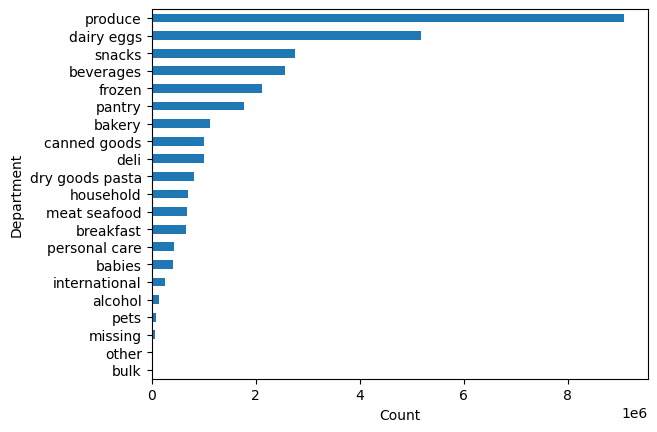

In [16]:
bar_products = df_2['department'].value_counts(ascending=True).plot.barh()
plt.xlabel('Count')
plt.ylabel('Department')

In [17]:
bar_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_products.png'), bbox_inches='tight')

### Make a more accurate Price_range_loc

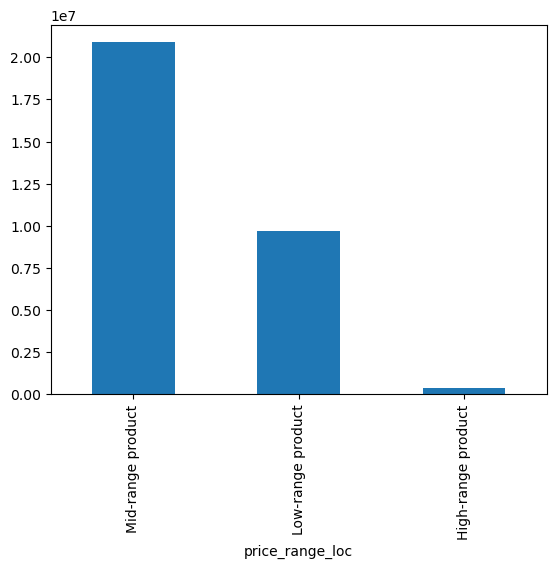

In [19]:
bar_price_range_loc = df_2['price_range_loc'].value_counts().plot.bar()

In [20]:
bar_price_range_loc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range_loc.png'), bbox_inches='tight')

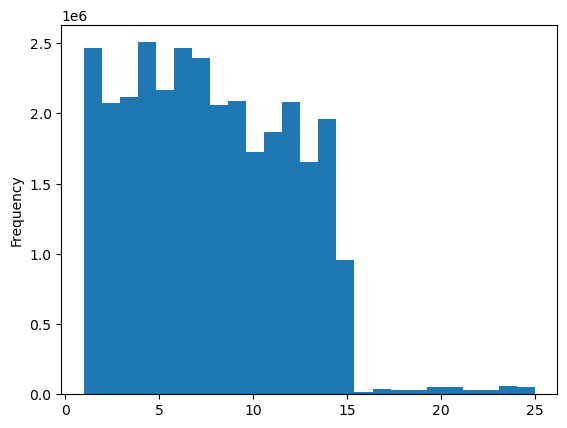

In [21]:
hist_price_prod = df_2['prices'].plot.hist(bins = 25)

In [22]:
# Make more even price categories

df_2.loc[df_2['prices'] >= 12.5, 'price_range'] = 'high'

df_2.loc[(df_2['prices'] <=12.5) & (df_2['prices'] > 5), 'price_range'] = 'mid-high' 

df_2.loc[(df_2['prices'] <= 7.5) & (df_2['prices'] >= 5), 'price_range'] = 'mid' 

df_2.loc[(df_2['prices'] > 2.5) & (df_2['prices'] <5 ), 'price_range'] = 'mid-low'

df_2.loc[df_2['prices'] <= 2.5 , 'price_range'] = 'low'

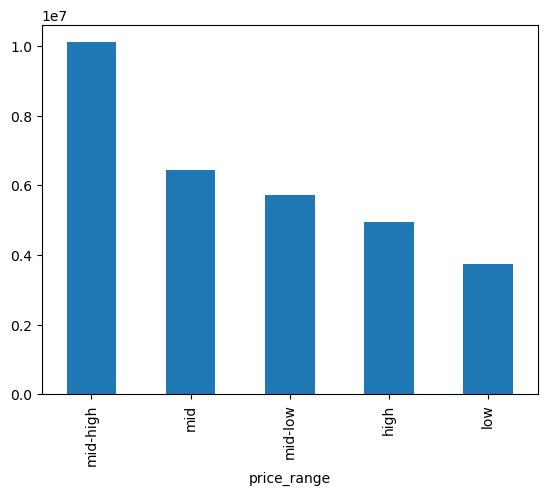

In [23]:
bar_price_range = df_2['price_range'].value_counts().plot.bar()

In [24]:
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'), bbox_inches='tight')

### Customer Profiles

#### Price 

In [76]:
# calculating average prices by customer frequency
customer_freq_prices = df_2.groupby('Customer_frequency_flag').agg({'prices' : ['mean']})

# check aggreagation results
customer_freq_prices

,prices
,mean
Customer_frequency_flag,
Frequent customer,7.790102
Non-frequent customer,7.781279
Regular customer,7.792358


(array([0, 1, 2]),
 [Text(0, 0, 'Frequent customer'),
  Text(1, 0, 'Non-frequent customer'),
  Text(2, 0, 'Regular customer')])

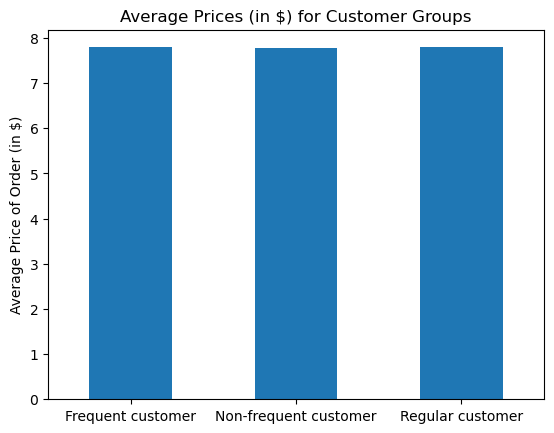

In [106]:
# bar chart of distribution of department by region

bar_customer_freq_prices = customer_freq_prices.plot(kind = 'bar', legend = False)
plt.title ('Average Prices (in $) for Customer Groups')
plt.xlabel('')
plt.ylabel('Average Price of Order (in $)')
plt.xticks(rotation=0)

In [108]:
bar_customer_freq_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_freq_by_prices.png'), bbox_inches='tight')

#### Order Frequency

In [83]:
# calculating average order frequency by customer frequency
customer_freq_order_freq = df_2.groupby('Customer_frequency_flag').agg({'days_since_prior_order' : ['mean']})

# check aggreagation results
customer_freq_order_freq

,days_since_prior_order
,mean
Customer_frequency_flag,
Frequent customer,7.858289
Non-frequent customer,22.790646
Regular customer,15.532112


(array([0, 1, 2]),
 [Text(0, 0, 'Frequent customer'),
  Text(1, 0, 'Non-frequent customer'),
  Text(2, 0, 'Regular customer')])

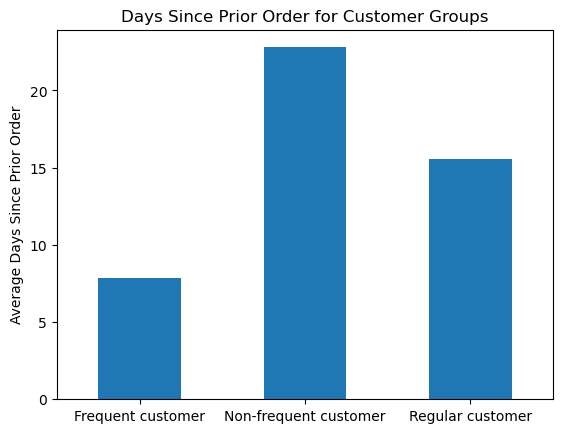

In [114]:
# bar chart of average order frequency by customer frequency

bar_customer_freq_order_freq = customer_freq_order_freq.plot(kind = 'bar', legend = False)
plt.title ('Days Since Prior Order for Customer Groups')
plt.xlabel('')
plt.ylabel('Average Days Since Prior Order')
plt.xticks(rotation=0)

In [128]:
#exporting bar chart 

bar_customer_freq_order_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_freq_by_order_freq.png'), bbox_inches='tight')

#### Income Group

In [146]:
# Creating crosstab for customer frequency and income group

customer_freq_income = pd.crosstab(df_2['income_group'], df_2['Customer_frequency_flag'], dropna = False)

In [139]:
customer_freq_income

Customer_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
high-income,2700205,345292,849778
low-income,3879096,620236,1303969
mid-income,14625175,1929447,4711366


(array([0, 1, 2]),
 [Text(0, 0, 'high-income'),
  Text(1, 0, 'low-income'),
  Text(2, 0, 'mid-income')])

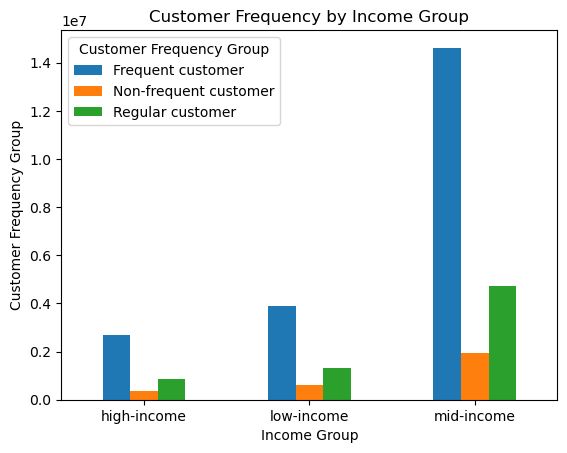

In [141]:
bar_customer_freq_income = customer_freq_income.plot(kind = 'bar')
plt.title ('Customer Frequency by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Customer Frequency Group')
plt.legend().set_title('Customer Frequency Group')
plt.xticks(rotation=0)

In [143]:
#exporting bar chart 

bar_customer_freq_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_freq_by_income.png'), bbox_inches='tight')

#### Region / Department

In [26]:
# Creating crosstab for region and department

reg_dept = pd.crosstab(df_2['department'], df_2['region'], dropna = False)

In [27]:
reg_dept

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


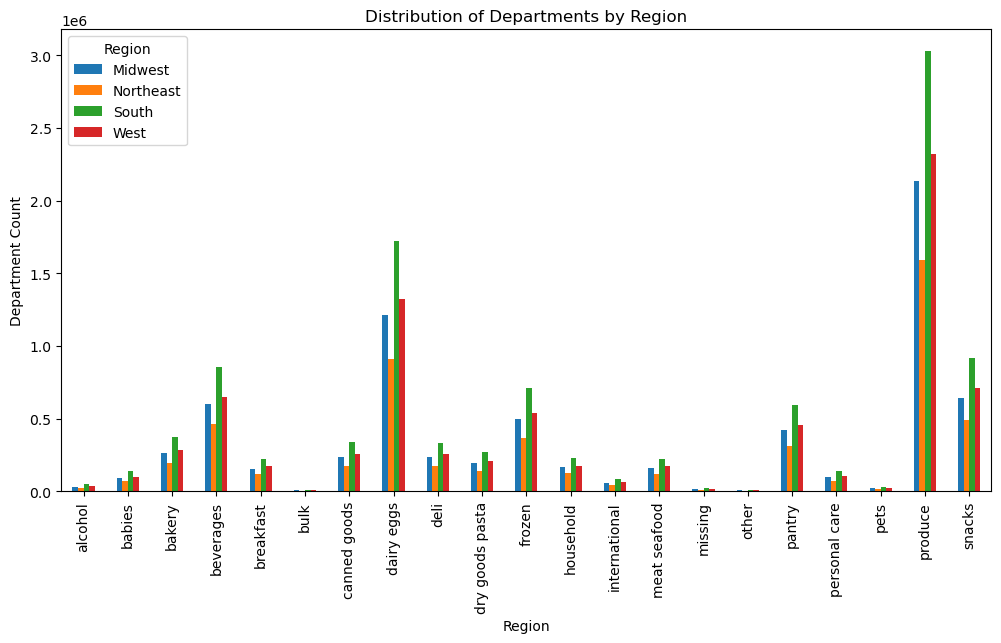

In [28]:
# bar chart of distribution of department by region

bar_3 = reg_dept.plot(kind = 'bar', figsize=(12, 6))
plt.title ('Distribution of Departments by Region')
plt.xlabel('Region')
plt.ylabel('Department Count')
plt.legend().set_title('Region')

In [29]:
# export bar chart

bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_distribution_by_region.png'), bbox_inches='tight')

In [30]:
# create crosstab for region and department group

reg_dept_group = pd.crosstab(df_2['region'], df_2['department_group'], dropna = False)

In [31]:
reg_dept_group

department_group,baby_pet,groceries,meat_seafood,miscellaneous,personal_care
region,,,,,
Midwest,117099,6274884,158260,443880,267390
Northeast,90446,4725788,118571,330511,199369
South,169420,8919922,224120,625120,372557
West,126487,6859690,173830,482373,284847


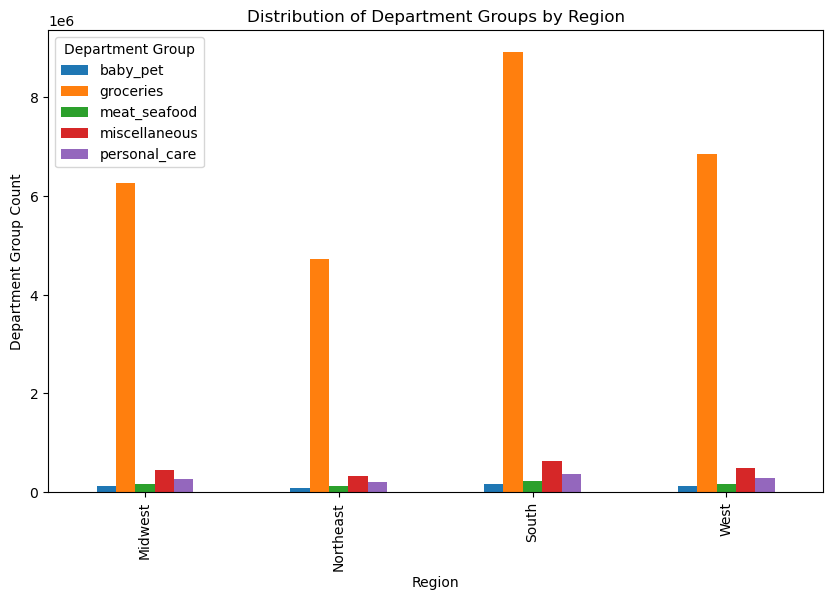

In [32]:
# bar chart of distribution of department by region

bar_4 = reg_dept_group.plot(kind = 'bar', figsize=(10, 6))
plt.title ('Distribution of Department Groups by Region')
plt.xlabel('Region')
plt.ylabel('Department Group Count')
plt.legend().set_title('Department Group')

In [33]:
# export bar chart

bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_group_distribution_by_region.png'), bbox_inches='tight')

In [34]:
# create crosstab for customer frequency by department

dept_customer_freq = pd.crosstab(df_2['department'], df_2['Customer_frequency_flag'], dropna = False)
dept_customer_freq

Customer_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department,,,
alcohol,100491,13271,30865
babies,316214,25297,68881
bakery,770435,103019,247374
beverages,1756158,244136,571607
breakfast,455837,64106,150907
bulk,25087,2514,5850
canned goods,658729,108011,245334
dairy eggs,3623889,452920,1100373
deli,674588,98098,231148


In [191]:
# create crosstab for price_range_loc by region

region_price_range = pd.crosstab(df_2['region'], df_2['price_range_loc'], dropna = False)
region_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,92073,2268086,4901354
Northeast,68929,1713062,3682694
South,130964,3218970,6961205
West,101110,2478945,5347172


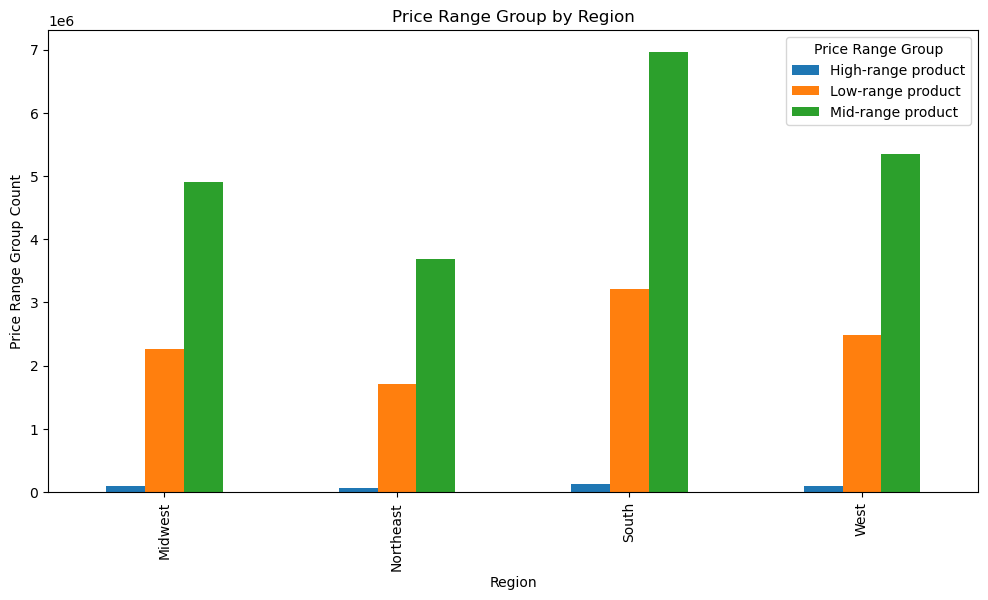

In [193]:
# bar chart for price_range_loc by region

bar_region_price_range = region_price_range.plot(kind = 'bar',  figsize=(12, 6))
plt.title ('Price Range Group by Region')
plt.xlabel('Region')
plt.ylabel('Price Range Group Count')
plt.legend().set_title('Price Range Group')

In [195]:
# export bar chart

bar_region_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_price_range.png'), bbox_inches='tight')

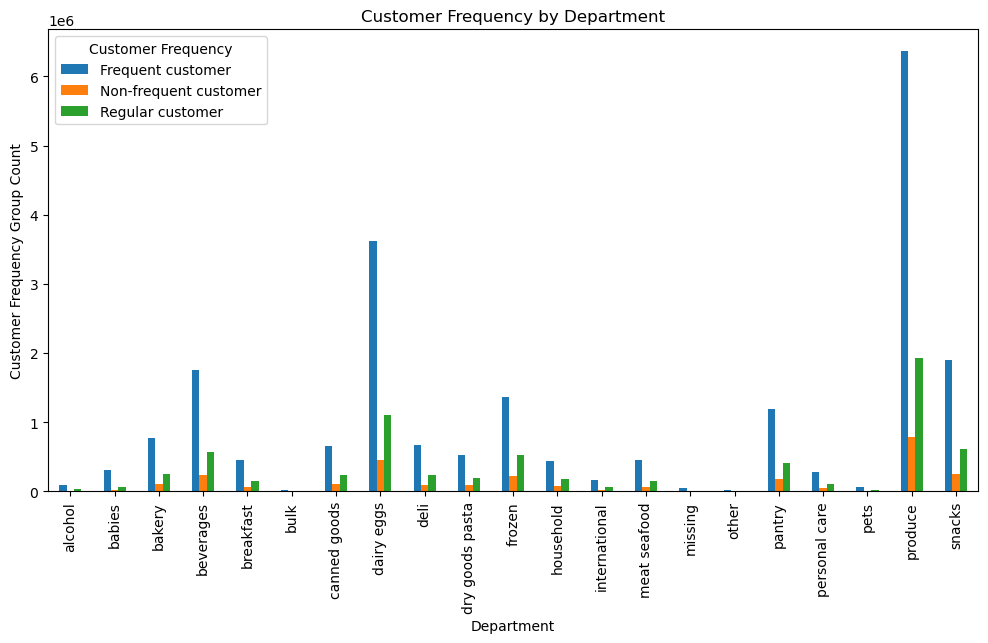

In [151]:
# bar chart for customer frequency by department

bar_7 = dept_customer_freq.plot(kind = 'bar',  figsize=(12, 6))
plt.title ('Customer Frequency by Department')
plt.xlabel('Department')
plt.ylabel('Customer Frequency Group Count')
plt.legend().set_title('Customer Frequency')

In [153]:
# export bar chart

bar_7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar2_customer_frequency_by_department.png'), bbox_inches='tight')

In [37]:
# create crosstab for customer frequency by region

reg_customer_freq = pd.crosstab(df_2['region'], df_2['Customer_frequency_flag'], dropna = False)
reg_customer_freq

Customer_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,4935393,690030,1636090
Northeast,3740982,496911,1226792
South,7073789,968006,2269344
West,5454312,740028,1732887


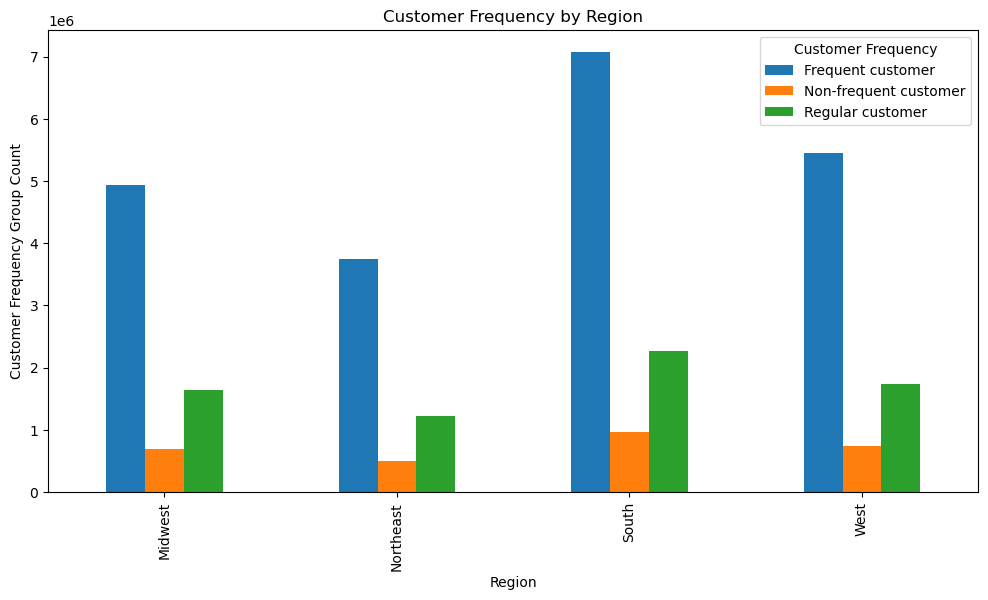

In [69]:
# bar chart for customer frequency by region

bar_reg_customer_freq = reg_customer_freq.plot(kind = 'bar',  figsize=(12, 6))
plt.title ('Customer Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Customer Frequency Group Count')
plt.legend().set_title('Customer Frequency')

In [71]:
# export bar chart

bar_reg_customer_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_frequency_by_region.png'), bbox_inches='tight')

In [37]:
# create crosstab for product frequency by income level

dept_income = pd.crosstab(df_2['department'], df_2['income_group'], dropna = False)
dept_income

income_group,high-income,low-income,mid-income
department,,,
alcohol,24067,28592,91968
babies,53001,57246,300145
bakery,148444,192181,780203
beverages,313379,594658,1663864
breakfast,83422,146984,440444
bulk,3671,7302,22478
canned goods,132414,156174,723486
dairy eggs,659249,903027,3614906
deli,125893,185290,692651


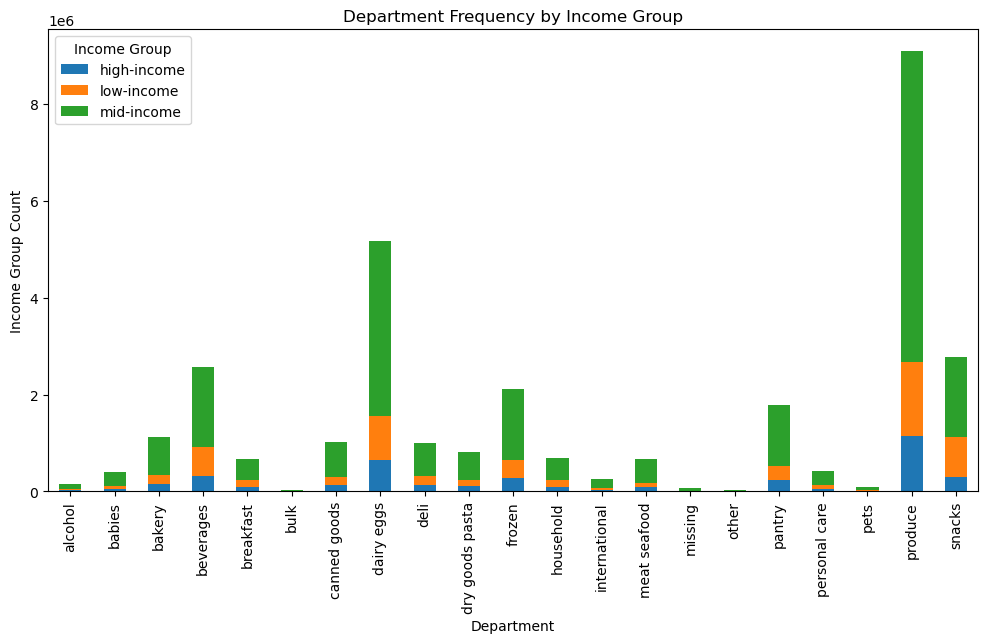

In [38]:
# bar chart for dept by income

stkdbar_dept_income = dept_income.plot(kind = 'bar', stacked = True,  figsize=(12, 6))
plt.title ('Department Frequency by Income Group')
plt.xlabel('Department')
plt.ylabel('Income Group Count')
plt.legend().set_title('Income Group')

stkdbar_dept_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_department_by_income.png'), bbox_inches='tight')

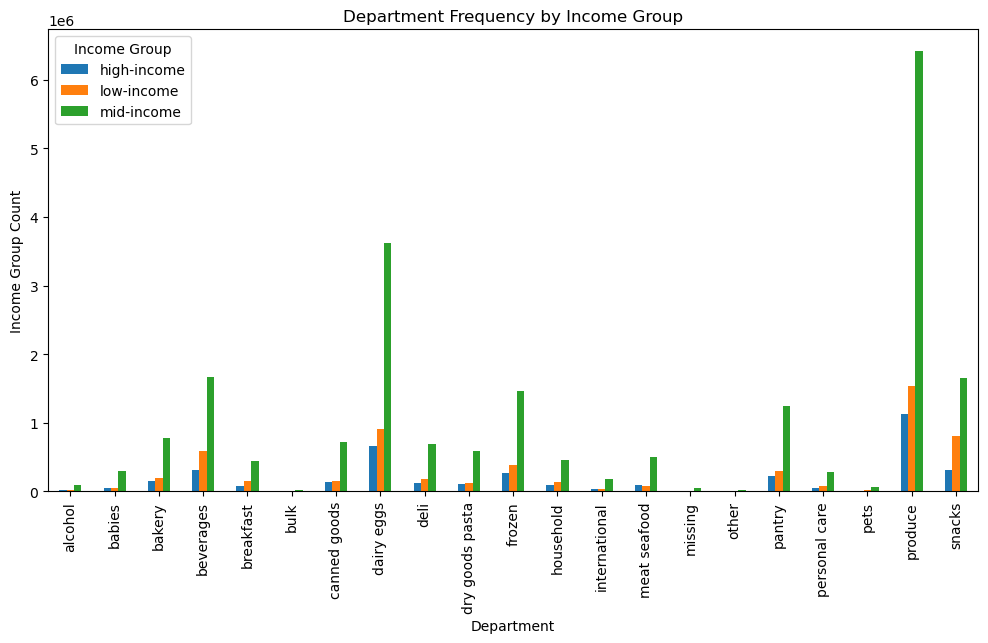

In [39]:
# regular bar chart for dept by income

bar_dept_income = dept_income.plot(kind = 'bar', figsize=(12, 6))
plt.title ('Department Frequency by Income Group')
plt.xlabel('Department')
plt.ylabel('Income Group Count')
plt.legend().set_title('Income Group')

bar_dept_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_by_income.png'), bbox_inches='tight')

#### Age

In [29]:
# Creating crosstab for region and age group

reg_age = pd.crosstab(df_2['region'], df_2['age_group'], dropna = False)

In [30]:
reg_age

age_group,Middle-Aged,Senior,Young Adult
region,,,
Midwest,3896420,1904046,1461047
Northeast,2868402,1484807,1111476
South,5475776,2708461,2126902
West,4224182,2098230,1604815


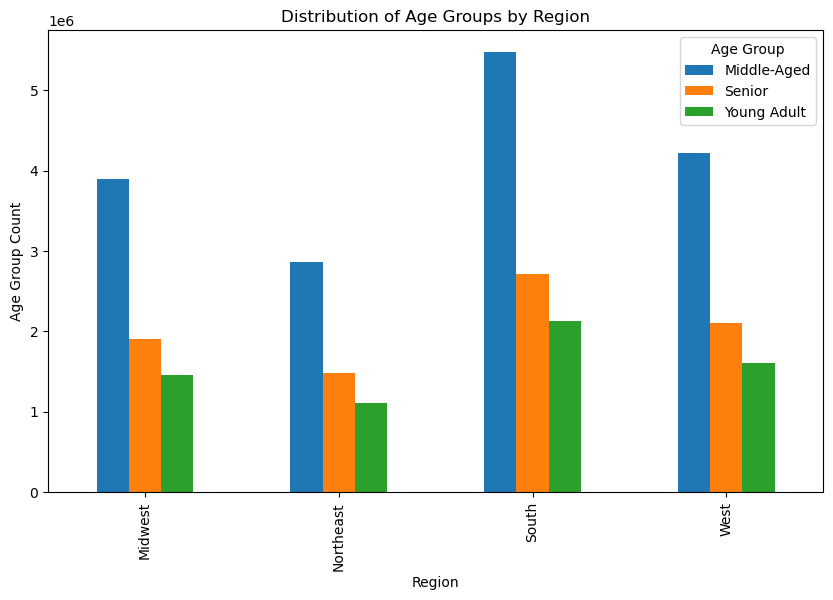

In [31]:
# bar chart for distribution of age groups by region

bar_1 = reg_age.plot(kind = 'bar', figsize=(10, 6))
plt.title ('Distribution of Age Groups by Region')
plt.xlabel('Region')
plt.ylabel('Age Group Count')
plt.legend().set_title('Age Group')

In [32]:
# export bar chart

bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group_distribution_by_region.png'), bbox_inches='tight')

In [33]:
# Creating crosstab for Customer frequency and age group

customer_freq_age = pd.crosstab(df_2['age_group'], df_2['Customer_frequency_flag'], dropna = False)

In [34]:
customer_freq_age

Customer_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Middle-Aged,11255804,1546585,3662391
Senior,5630976,760132,1804436
Young Adult,4317696,588258,1398286


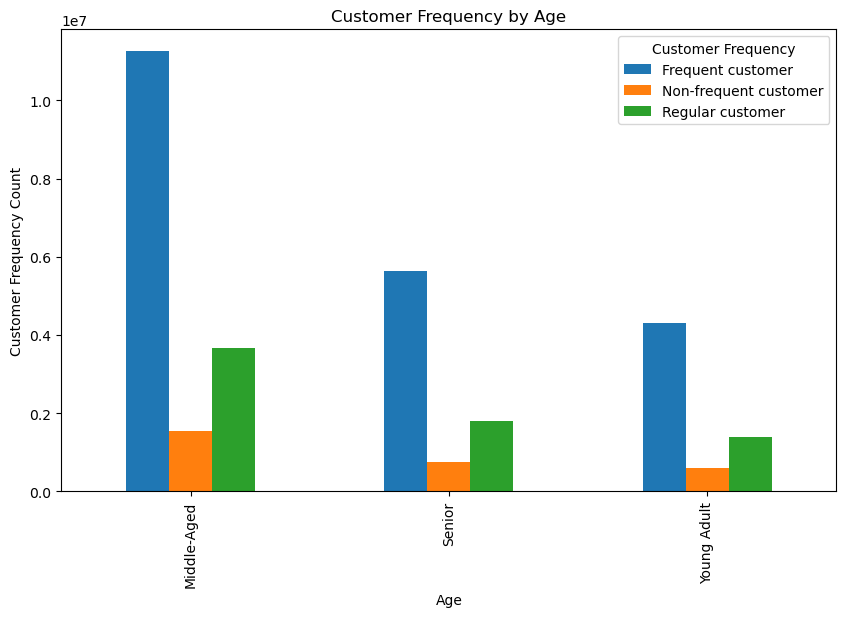

In [35]:
# bar chart for distribution of age groups by region

bar_5 = customer_freq_age.plot(kind = 'bar', figsize=(10, 6))
plt.title ('Customer Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Customer Frequency Count')
plt.legend().set_title('Customer Frequency')

In [36]:
# export bar chart

bar_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_frequency_by_age.png'), bbox_inches='tight')

#### Income

In [38]:
# Creating crosstab for region and income group

reg_income = pd.crosstab(df_2['region'], df_2['income_group'], dropna = False)

In [39]:
reg_income

income_group,high-income,low-income,mid-income
region,,,
Midwest,917495,1341096,5002922
Northeast,677730,1020134,3766821
South,1290460,1966535,7054144
West,1009590,1475536,5442101


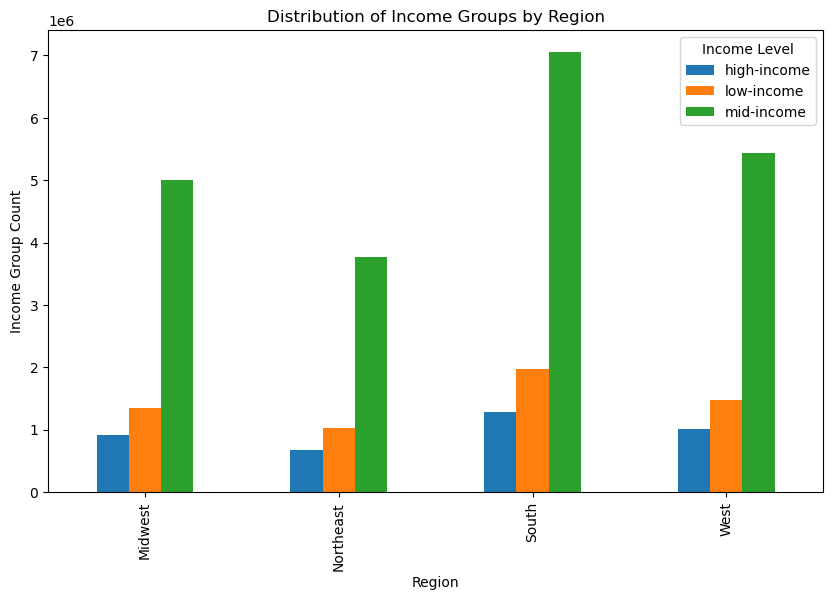

In [40]:
# bar chart of distribution of income by region

bar_2 = reg_income.plot(kind = 'bar', figsize=(10, 6))
plt.title ('Distribution of Income Groups by Region')
plt.xlabel('Region')
plt.ylabel('Income Group Count')
plt.legend().set_title('Income Level')

In [41]:
# export bar chart

bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group_distribution_by_region.png'), bbox_inches='tight')

#### Marital Status

In [43]:
# Creating crosstab for marital status and customer frequency

marital_cust_freq = pd.crosstab(df_2['marital_status'], df_2['Customer_frequency_flag'], dropna = False)

In [44]:
marital_cust_freq

Customer_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
marital_status,,,
divorced/widowed,1819123,243934,582214
living with parents and siblings,1030514,138646,312012
married,14888825,2039823,4815063
single,3466014,472572,1155824


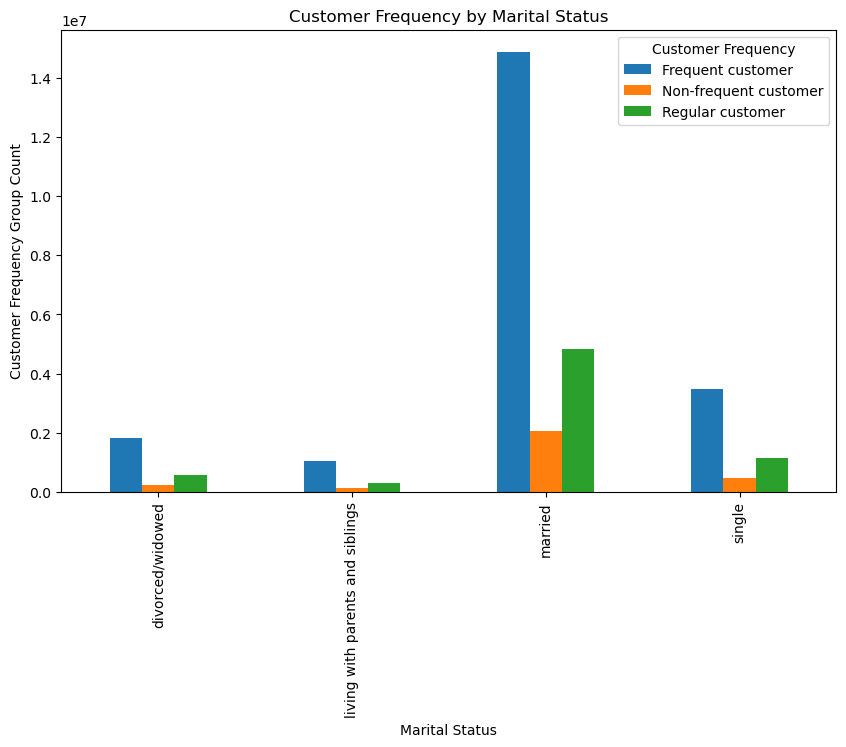

In [45]:
# bar chart of customer frequency by marital status

bar_6 = marital_cust_freq.plot(kind = 'bar', figsize=(10, 6))
plt.title ('Customer Frequency by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Customer Frequency Group Count')
plt.legend().set_title('Customer Frequency')

In [46]:
# export bar chart

bar_6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_frequency_by_marital_status.png'), bbox_inches='tight')

# Clean up dataframe and Export 

In [91]:
# fix column name to match formatting

df_2.rename(columns = {'Customer_frequency_flag' : 'customer_frequency_flag'}, inplace = True)

In [93]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag,age_group,income_group,department_group,household_size,day_of_order_group,hour_of_order_group,department,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday,morning,snacks,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday,afternoon,snacks,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest day,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302,Northeast,high-activity,Senior,high-income,groceries,mid-sized,weekend,evening,snacks,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,2019-01-04,2,married,57797,West,high-activity,Middle-Aged,low-income,groceries,mid-sized,weekend,morning,snacks,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Regularly busy,Most orders,9,New customer,5.957576,Low spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,2019-05-08,3,living with parents and siblings,34171,South,high-activity,Young Adult,low-income,groceries,large,weekday,afternoon,snacks,both


In [170]:
df_2.drop('_merge', axis = 1, inplace = True)

In [174]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag,age_group,income_group,department_group,household_size,day_of_order_group,hour_of_order_group,department,price_range
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday,morning,snacks,mid
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday,afternoon,snacks,mid
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest day,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302,Northeast,high-activity,Senior,high-income,groceries,mid-sized,weekend,evening,snacks,mid
3,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,2019-01-04,2,married,57797,West,high-activity,Middle-Aged,low-income,groceries,mid-sized,weekend,morning,snacks,mid
4,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Regularly busy,Most orders,9,New customer,5.957576,Low spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,2019-05-08,3,living with parents and siblings,34171,South,high-activity,Young Adult,low-income,groceries,large,weekday,afternoon,snacks,mid


In [176]:
df_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_2.pkl'))